In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r'C:\Users\segag\OneDrive\Документы\1) Skill Factory\IDE\data_for_random_projects\data_PVT_realty_estate_data_analysis\realty-offers.xlsx')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86345 entries, 0 to 86344
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              86345 non-null  object 
 1   status          86345 non-null  object 
 2   operation       86345 non-null  object 
 3   market          86344 non-null  object 
 4   class_letter    84786 non-null  object 
 5   area            86345 non-null  float64
 6   fullMeterPrice  86326 non-null  float64
 7   fullAreaPrice   86326 non-null  float64
 8   realtyid        86345 non-null  int64  
 9   realty_prefix   86302 non-null  object 
 10  realty_name     86344 non-null  object 
 11  tax             86345 non-null  object 
 12  kor_koef        3667 non-null   float64
 13  baseMeterPrice  86326 non-null  float64
dtypes: float64(5), int64(1), object(8)
memory usage: 9.2+ MB
None


id  status operation       market class_letter    area  \
0      rr80940  active      rent       retail            A  470.00   
1      sa82957  active      sale  appartments            A   77.60   
2      so59302  active      sale      offices            A   97.80   
3      ro26284  active      rent      offices          NaN    0.00   
4      sa82454  active      sale  appartments            A   66.26   
...        ...     ...       ...          ...          ...     ...   
86340  ro81684     off      rent      offices            B  154.60   
86341  ro84093     off      rent      offices            B   50.00   
86342  rw28295     off      rent   warehouses          NaN  450.00   
86343  ro81683     off      rent      offices            B  150.00   
86344  ro25969     off      rent      offices          NaN  217.00   

       fullMeterPrice  fullAreaPrice  realtyid                realty_prefix  \
0             28000.0   1.096667e+06      1930                 Бизнес-центр   
1            771907.0   5.989998e+07      4957  Офисно-гостиничный комплекс   
2            334000.0   3.266520e+07      3974                 Бизнес-центр   
3                 0.0   0.000000e+00       578                      Особняк   
4           1300000.0   8.613800e+07      4204               Жилой Комплекс   
...               ...            ...       ...                          ...   
86340         24700.0   3.182183e+05      5204      Административное здание   
86341         24700.0   1.029167e+05      5204      Административное здание   
86342          6000.0   2.250000e+05      2572           Складской комплекс   
86343         24700.0   3.087500e+05      5204      Административное здание   
86344         12165.0   2.199837e+05      3070                 Бизнес-центр   

              realty_name  tax  kor_koef  baseMeterPrice  
0         Удальцова Плаза  nds       NaN    2.333333e+04  
1           Звезды Арбата  nds       NaN    6.432558e+05  
2       STONE Савеловская  nds       NaN    2.783333e+05  
3                    1812  usn       NaN    0.000000e+00  
4                Fairmont  nds       NaN    1.083333e+06  
...                   ...  ...       ...             ...  
86340  Яузский б-р., 13с3  usn       NaN    2.470000e+04  
86341  Яузский б-р., 13с3  usn       NaN    2.470000e+04  
86342        Горбунова, 2  nds       NaN    5.000000e+03  
86343  Яузский б-р., 13с3  usn       NaN    2.470000e+04  
86344                 NaN  usn       NaN    1.216500e+04  

[86345 rows x 14 columns]

In [290]:
df = df.astype({col: 'string' for col in df.select_dtypes('object').columns})

print(df.dtypes)

id                 string
status             string
operation          string
market             string
class_letter       string
area              float64
fullMeterPrice    float64
fullAreaPrice     float64
realtyid            int64
realty_prefix      string
realty_name        string
tax                string
kor_koef          float64
baseMeterPrice    float64
dtype: object


In [291]:
df['fullAreaPrice'] = df['fullAreaPrice'].round(0)
df['baseMeterPrice'] = df['baseMeterPrice'].round(0)
df['area'] = df['area'].round(0)
df['fullMeterPrice'] = df['fullMeterPrice'].round(0)

print(df[['fullAreaPrice', 'baseMeterPrice']].head())

   fullAreaPrice  baseMeterPrice
0      1096667.0         23333.0
1     59899983.0        643256.0
2     32665200.0        278333.0
3            0.0             0.0
4     86138000.0       1083333.0


In [292]:
min = df['baseMeterPrice'].min()
max = df['baseMeterPrice'].max()
mean = round(df['baseMeterPrice'].mean(), 2)

print(f'Минильная цена за кв. метр: {min}')
print(f'Максимальная цена за кв. метр: {mean}')
print(f'Максимальная цена за кв. метр: {max}')


Минильная цена за кв. метр: 0.0
Максимальная цена за кв. метр: 105362.83
Максимальная цена за кв. метр: 1200000000.0


array([[<AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'fullMeterPrice'}>],
       [<AxesSubplot:title={'center':'fullAreaPrice'}>,
        <AxesSubplot:title={'center':'kor_koef'}>],
       [<AxesSubplot:title={'center':'baseMeterPrice'}>, <AxesSubplot:>]],
      dtype=object)

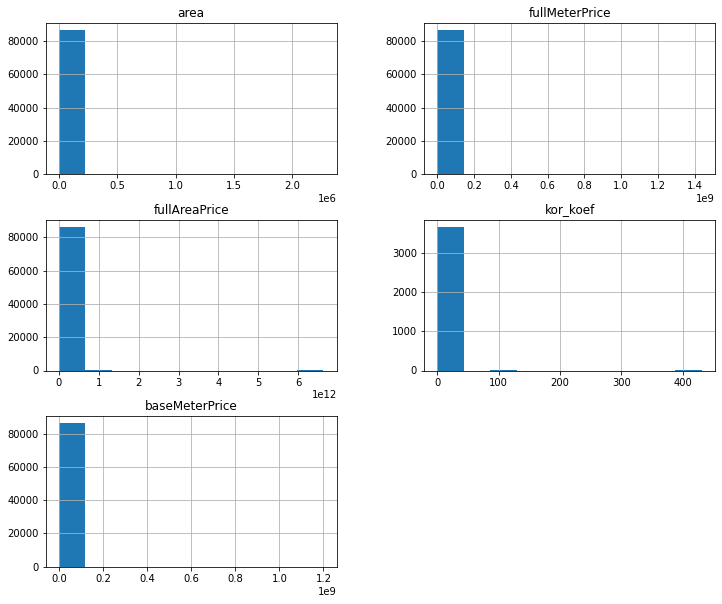

In [293]:

hist = df[['area', 'fullMeterPrice', 'fullAreaPrice', 'kor_koef', 'baseMeterPrice']].hist(figsize=(12, 10))
hist

In [294]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

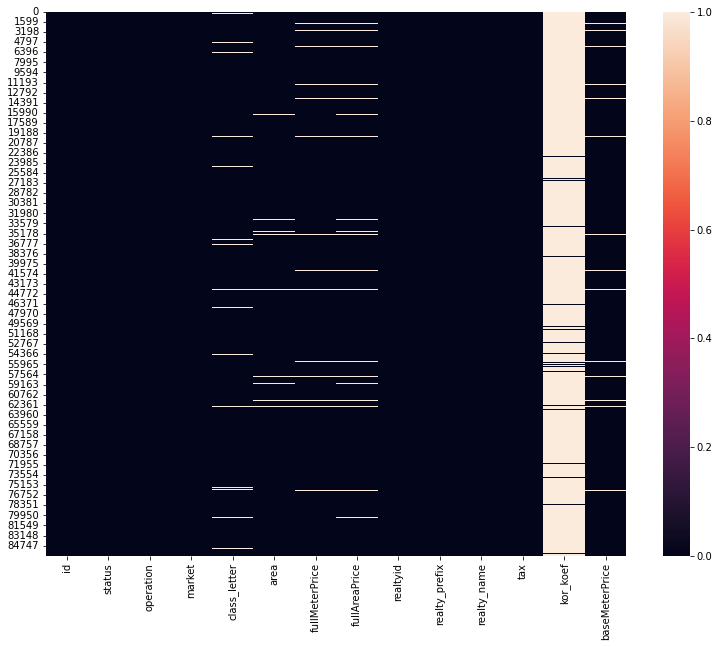

In [295]:
df.replace(0.0, pd.NA, inplace=True)

plt.figure(figsize=(13, 10))
sns.heatmap(df.isnull())

In [296]:
df_cleaned = df.drop('kor_koef', axis=1)
df_cleaned = df_cleaned.dropna(subset=['class_letter'])
df_cleaned[['area', 'fullMeterPrice', 'fullAreaPrice', 'baseMeterPrice']] = \
    df_cleaned[['area', 'fullMeterPrice', 'fullAreaPrice', 'baseMeterPrice']]. \
        fillna(df_cleaned[['area', 'fullMeterPrice', 'fullAreaPrice', 'baseMeterPrice']].median())
  

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84786 entries, 0 to 86343
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              84786 non-null  string 
 1   status          84786 non-null  string 
 2   operation       84786 non-null  string 
 3   market          84785 non-null  string 
 4   class_letter    84786 non-null  string 
 5   area            84786 non-null  float64
 6   fullMeterPrice  84786 non-null  float64
 7   fullAreaPrice   84786 non-null  float64
 8   realtyid        84786 non-null  int64  
 9   realty_prefix   84746 non-null  string 
 10  realty_name     84786 non-null  string 
 11  tax             84786 non-null  string 
 12  baseMeterPrice  84786 non-null  float64
dtypes: float64(4), int64(1), string(8)
memory usage: 9.1 MB


<AxesSubplot:>

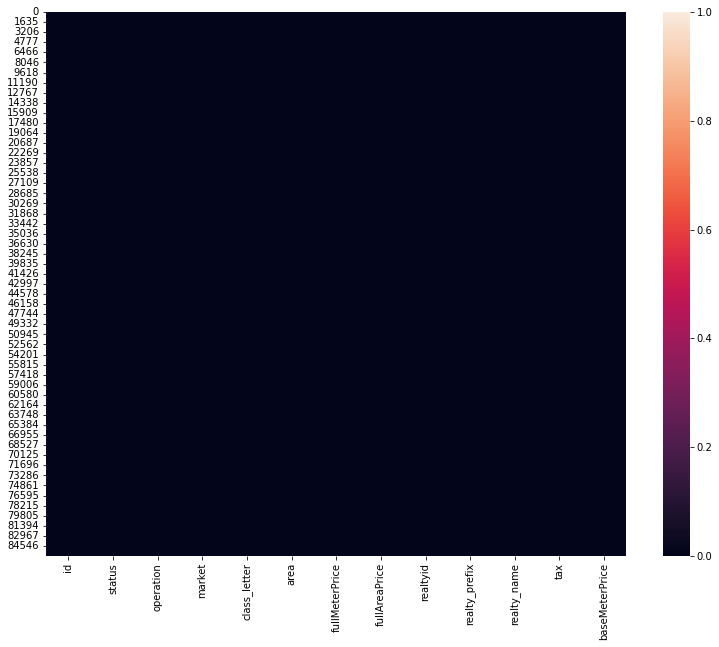

In [297]:
df_cleaned.replace(0.0, pd.NA, inplace=True)

plt.figure(figsize=(13, 10))
sns.heatmap(df_cleaned.isnull())

In [298]:
print(df_cleaned['class_letter'].unique())

<StringArray>
['A', 'C', 'B+', 'B', 'A+', 'C+']
Length: 6, dtype: string


In [299]:
df_cleaned.groupby('class_letter').agg({'area': ['max', 'min', 'mean', 'median'], \
    'fullMeterPrice': ['max', 'min', 'mean', 'median'], \
        'fullAreaPrice': ['max', 'min', 'mean', 'median'], \
            'baseMeterPrice': ['max', 'min', 'mean', 'median']})


area                           fullMeterPrice           \
                   max   min         mean median            max      min   
class_letter                                                               
A             133063.0   1.0   829.974152  180.0   3.212140e+08      1.0   
A+             32757.0  56.0  4280.500000  633.5   4.854910e+05  53892.0   
B             190000.0  -3.0   341.683363   77.0   3.104348e+08      1.0   
B+             64000.0   1.0   333.219332  105.0   1.440000e+09      1.0   
C             160700.0   1.0   571.038457  100.0   2.815465e+08      1.0   
C+              6700.0   1.0   623.529412  198.0   2.000000e+05      1.0   

                                     fullAreaPrice                          \
                       mean   median           max       min          mean   
class_letter                                                                 
A             166897.211931  42000.0  5.075181e+10      83.0  4.523579e+07   
A+             92654.500000  57471.5  1.501362e+08  300001.0  2.586211e+07   
B              73056.057931  16500.0  7.140000e+10   -2500.0  1.498897e+07   
B+            158753.672090  22000.0  6.630000e+12      25.0  3.036722e+08   
C              61158.530364  11400.0  1.285600e+12     700.0  1.833852e+08   
C+             15613.725490   5400.0  9.599999e+07       1.0  3.175978e+06   

                        baseMeterPrice                                   
                 median            max      min           mean   median  
class_letter                                                             
A             1150000.0   2.676783e+08      1.0  147752.450560  36000.0  
A+            4041652.0   4.045760e+05  44910.0   77211.857143  47892.5  
B              130722.0   2.586957e+08      1.0   66060.322188  14583.0  
B+             239846.0   1.200000e+09      1.0  144874.337802  19000.0  
C               91500.0   2.346221e+08      1.0   54003.344277  10000.0  
C+             122850.0   2.000000e+05      1.0   14295.235294   4900.0

In [300]:
columns = ['area', 'fullMeterPrice', 'fullAreaPrice', 'baseMeterPrice']

for column in columns:
    count = len(df_cleaned[df_cleaned[column] < 2000])
    total = len(df_cleaned[column])
    percentage = count / total * 100
    print(f"Столбец {column}: {percentage:.2f}% значений меньше 2000.")


Столбец area: 96.14% значений меньше 2000.
Столбец fullMeterPrice: 0.68% значений меньше 2000.
Столбец fullAreaPrice: 0.08% значений меньше 2000.
Столбец baseMeterPrice: 0.75% значений меньше 2000.


In [301]:
df_cleaned_2 = df_cleaned[(df_cleaned['area'] >= 10) & (df_cleaned['fullMeterPrice'] >= 2000) & \
    (df_cleaned['fullAreaPrice'] >= 2000) & (df_cleaned['baseMeterPrice'] >= 2000)]

df_cleaned_2

id  status operation       market class_letter    area  \
0      rr80940  active      rent       retail            A   470.0   
1      sa82957  active      sale  appartments            A    78.0   
2      so59302  active      sale      offices            A    98.0   
4      sa82454  active      sale  appartments            A    66.0   
5      ro84445     off      rent      offices            C    50.0   
...        ...     ...       ...          ...          ...     ...   
86338  ro15834     off      rent      offices            B  1000.0   
86339  ro84092  active      rent      offices            B   133.0   
86340  ro81684     off      rent      offices            B   155.0   
86341  ro84093     off      rent      offices            B    50.0   
86343  ro81683     off      rent      offices            B   150.0   

       fullMeterPrice  fullAreaPrice  realtyid                realty_prefix  \
0             28000.0      1096667.0      1930                 Бизнес-центр   
1            771907.0     59899983.0      4957  Офисно-гостиничный комплекс   
2            334000.0     32665200.0      3974                 Бизнес-центр   
4           1300000.0     86138000.0      4204               Жилой Комплекс   
5             20400.0       239846.0      5264      Административное здание   
...               ...            ...       ...                          ...   
86338         21600.0      1800000.0      2880                      Особняк   
86339         24700.0       273758.0      5204      Административное здание   
86340         24700.0       318218.0      5204      Административное здание   
86341         24700.0       102917.0      5204      Административное здание   
86343         24700.0       308750.0      5204      Административное здание   

               realty_name  tax  baseMeterPrice  
0          Удальцова Плаза  nds         23333.0  
1            Звезды Арбата  nds        643256.0  
2        STONE Савеловская  nds        278333.0  
4                 Fairmont  nds       1083333.0  
5      2005-05-09 00:00:00  usn         18000.0  
...                    ...  ...             ...  
86338           Яузская, 6  nds         18000.0  
86339   Яузский б-р., 13с3  usn         24700.0  
86340   Яузский б-р., 13с3  usn         24700.0  
86341   Яузский б-р., 13с3  usn         24700.0  
86343   Яузский б-р., 13с3  usn         24700.0  

[82884 rows x 13 columns]

In [302]:
columns = ['area', 'fullMeterPrice', 'fullAreaPrice', 'baseMeterPrice']

for column in columns:
    count = len(df_cleaned_2[df_cleaned_2[column] < 2000])
    total = len(df_cleaned_2[column])
    percentage = count / total * 100
    print(f"Столбец {column}: {percentage:.2f}% значений меньше 2000.")


Столбец area: 96.19% значений меньше 2000.
Столбец fullMeterPrice: 0.00% значений меньше 2000.
Столбец fullAreaPrice: 0.00% значений меньше 2000.
Столбец baseMeterPrice: 0.00% значений меньше 2000.


In [303]:
df_cleaned_2.groupby(['operation', 'market', 'class_letter']).agg({
    'area': ['max', 'min', 'mean', 'median'],
    'fullMeterPrice': ['max', 'min', 'mean', 'median'],
    'fullAreaPrice': ['max', 'min', 'mean', 'median'],
    'baseMeterPrice': ['max', 'min', 'mean', 'median']
})

area                                \
                                            max     min          mean  median   
operation market         class_letter                                           
rent      appartments    A                414.0    37.0     84.184211    79.5   
                         B                700.0   107.0    376.714286   379.0   
                         B+              1582.0    80.0    432.142857   306.0   
          country houses B                421.0   421.0    421.000000   421.0   
          flats          A                340.0   310.0    325.000000   325.0   
                         B               7889.0   173.0   2765.666667   235.0   
          offices        A             110300.0    10.0    632.966651   224.0   
                         A+             32757.0  1000.0   9626.166667  6000.0   
                         B             190000.0    10.0    228.978718    70.0   
                         B+             54880.0    10.0    305.904528   107.0   
                         C              16800.0    10.0    155.421658    50.0   
                         C+               564.0    12.0    110.133333    60.0   
          retail         A              13703.0    10.0    335.678652   123.0   
                         A+               779.0    56.0    284.428571   154.0   
                         B              18000.0    10.0    283.067885   100.0   
                         B+             11759.0    10.0    248.241758    97.0   
                         C               1434.0    10.0    241.280851   118.0   
                         C+               600.0   350.0    475.000000   475.0   
          warehouses     A             133063.0    10.0   5860.268222  2500.0   
                         B              32000.0    10.0    865.096223   295.0   
                         B+             41000.0    10.0   1344.246774   300.5   
                         C              23364.0    10.0    764.765810   300.0   
                         C+              6700.0   151.0   1307.666667   950.0   
sale      appartments    A               1303.0    20.0    115.562836    93.0   
                         B                570.0    15.0     69.485437    53.5   
                         B+              7949.0    23.0    130.021021    71.0   
          country houses A                460.0   243.0    365.300000   375.0   
                         B              12700.0   100.0   3916.250000  1180.0   
          flats          A               1043.0    32.0    101.500000    72.0   
                         A+               179.0   179.0    179.000000   179.0   
                         B               7889.0    33.0    656.071429    91.0   
                         B+               654.0    15.0     76.678571    40.0   
          offices        A              44000.0    11.0    562.585114   140.5   
                         B              19147.0    10.0    545.346259    96.0   
                         B+             46880.0    10.0    378.361750   113.0   
                         C               7502.0    10.0    507.664151   106.0   
                         C+              1368.0   234.0    801.000000   801.0   
          retail         A               5278.0    13.0    145.898098    86.5   
                         B              19300.0    10.0    526.689424   111.0   
                         B+              3312.0    10.0    154.130045    93.0   
                         C               2728.0    16.0    382.697674   176.0   
                         C+                55.0    55.0     55.000000    55.0   
          warehouses     A             110000.0    10.0  11679.511111  4291.0   
                         B             104800.0    12.0  10917.655914  3486.0   
                         B+             64000.0    18.0   6565.850000   995.0   
                         C             160700.0    17.0   7243.993711   948.0   

                                      fullMeterPrice                     

In [304]:
df_cleaned_2[df_cleaned_2['market'] == 'offices'].\
    groupby(['operation', 'market', 'class_letter']).agg({
    'area': ['max', 'min', 'mean', 'median'],                                                                     
    'fullMeterPrice': ['max', 'min', 'mean', 'median'],
    'fullAreaPrice': ['max', 'min', 'mean', 'median'],
    'baseMeterPrice': ['max', 'min', 'mean', 'median']
})


area                               \
                                     max     min         mean  median   
operation market  class_letter                                          
rent      offices A             110300.0    10.0   632.966651   224.0   
                  A+             32757.0  1000.0  9626.166667  6000.0   
                  B             190000.0    10.0   228.978718    70.0   
                  B+             54880.0    10.0   305.904528   107.0   
                  C              16800.0    10.0   155.421658    50.0   
                  C+               564.0    12.0   110.133333    60.0   
sale      offices A              44000.0    11.0   562.585114   140.5   
                  B              19147.0    10.0   545.346259    96.0   
                  B+             46880.0    10.0   378.361750   113.0   
                  C               7502.0    10.0   507.664151   106.0   
                  C+              1368.0   234.0   801.000000   801.0   

                               fullMeterPrice                         \
                                          max      min          mean   
operation market  class_letter                                         
rent      offices A               143400000.0   3000.0  5.927226e+04   
                  A+                  55000.0  55000.0  5.500000e+04   
                  B                 1574667.0   2400.0  1.954201e+04   
                  B+                5616000.0   2000.0  2.428119e+04   
                  C                  900000.0   2000.0  1.531902e+04   
                  C+                  27712.0   7200.0  1.603560e+04   
sale      offices A                 7120744.0   4162.0  3.232017e+05   
                  B               310434782.0   4500.0  6.382320e+05   
                  B+              750000000.0   3250.0  4.962674e+05   
                  C               281546465.0   8640.0  1.183866e+06   
                  C+                 200000.0  70175.0  1.350875e+05   

                                         fullAreaPrice              \
                                  median           max         min   
operation market  class_letter                                       
rent      offices A              33000.0  1.146124e+09      8662.0   
                  A+             55000.0  1.501362e+08   4583333.0   
                  B              16000.0  9.999996e+08      4167.0   
                  B+             20000.0  4.137120e+08      5417.0   
                  C              12500.0  3.864000e+07      3780.0   
                  C+             13811.0  5.640000e+05     15000.0   
sale      offices A             275000.0  2.650000e+10    239846.0   
                  B             185092.5  7.140000e+10    239846.0   
                  B+            220000.0  6.630000e+12    239846.0   
                  C              97400.0  2.760056e+11    239846.0   
                  C+            135087.5  9.599999e+07  46800000.0   

                                                         baseMeterPrice  \
                                        mean      median            max   
operation market  class_letter                                            
rent      offices A             2.278988e+06    554191.0    119500000.0   
                  A+            4.411993e+07  27499997.0        45833.0   
                  B             4.546836e+05     98100.0      1574667.0   
                  B+            6.180021e+05    198353.0      5142857.0   
                  C             2.055952e+05     57979.0       750000.0   
                  C+            1.430441e+05     76667.0        27712.0   
sale      offices A             1.900275e+08  40071796.5      5933954.0   
                  B             2.104759e+08  20322799.5    258695652.0   
                  B+            1.945726e+09  23780700.0    750000000.0   
                  C             1.088937e+09  10700000.0    234622054.0   
                  C+            7.139999e+07  71

In [305]:
# Аномальные значения оказывают более сильное влияние, чем предполагалось на первый взгляд
df_cleaned.describe()

area  fullMeterPrice  fullAreaPrice      realtyid  \
count   84786.000000    8.478600e+04   8.478600e+04  84786.000000   
mean      471.960701    1.191211e+05   1.281587e+08   2020.025617   
std      2517.222926    5.927530e+06   2.344666e+10   1335.421656   
min        -3.000000    1.000000e+00  -2.500000e+03      1.000000   
25%        44.000000    1.395000e+04   7.104300e+04    915.000000   
50%       105.000000    2.040000e+04   2.398460e+05   1800.000000   
75%       296.000000    3.835000e+04   1.146945e+06   2887.000000   
max    190000.000000    1.440000e+09   6.630000e+12   5467.000000   

       baseMeterPrice  
count    8.478600e+04  
mean     1.072855e+05  
std      5.150323e+06  
min      1.000000e+00  
25%      1.200000e+04  
50%      1.800000e+04  
75%      3.353350e+04  
max      1.200000e+09

In [306]:
# Аномальные значения оказывают более сильное влияние, чем предполагалось на первый взгляд
df_cleaned.describe()

area  fullMeterPrice  fullAreaPrice      realtyid  \
count   84786.000000    8.478600e+04   8.478600e+04  84786.000000   
mean      471.960701    1.191211e+05   1.281587e+08   2020.025617   
std      2517.222926    5.927530e+06   2.344666e+10   1335.421656   
min        -3.000000    1.000000e+00  -2.500000e+03      1.000000   
25%        44.000000    1.395000e+04   7.104300e+04    915.000000   
50%       105.000000    2.040000e+04   2.398460e+05   1800.000000   
75%       296.000000    3.835000e+04   1.146945e+06   2887.000000   
max    190000.000000    1.440000e+09   6.630000e+12   5467.000000   

       baseMeterPrice  
count    8.478600e+04  
mean     1.072855e+05  
std      5.150323e+06  
min      1.000000e+00  
25%      1.200000e+04  
50%      1.800000e+04  
75%      3.353350e+04  
max      1.200000e+09

In [307]:
# Минимальная площадь должна составлять 10 метров
anomalous_rows_area = df_cleaned[df_cleaned['area'] < 10]
anomalous_rows_area

id status operation   market class_letter  area  fullMeterPrice  \
519    ro74343    off      rent  offices            B   9.0         20571.0   
537    ro74576    off      rent  offices            B   7.0         20000.0   
550    ro76908    off      rent  offices            B   9.0         20666.0   
558    ro82209    off      rent  offices            C   1.0         20400.0   
704    ro64224    off      rent  offices            B   8.0         15190.0   
...        ...    ...       ...      ...          ...   ...             ...   
85940  ro81806    off      rent  offices            C   1.0             1.0   
86155   ro3966    off      rent  offices            A   8.0         28320.0   
86261  ro82557    off      rent  offices            B   1.0         20400.0   
86294  ro82248    off      rent  offices            B   1.0             1.0   
86335  ro82936    off      rent  offices            B   1.0             1.0   

       fullAreaPrice  realtyid            realty_prefix  \
519          15600.0      4612             Бизнес-центр   
537          12000.0      4612             Бизнес-центр   
550          15499.0      4612             Бизнес-центр   
558         239846.0      5259  Административное здание   
704          10000.0      4226           Нежилое здание   
...              ...       ...                      ...   
85940       239846.0      5220  Административное здание   
86155        18172.0      2420             Бизнес-центр   
86261       239846.0      5287             Бизнес-центр   
86294       239846.0      5267  Административное здание   
86335       239846.0      5344             Бизнес-центр   

                 realty_name  tax  baseMeterPrice  
519    1-я Пугачевская, 25с1  nds         17142.0  
537    1-я Пугачевская, 25с1  nds         16667.0  
550    1-я Пугачевская, 25с1  nds         17222.0  
558        1-я Северная, 1с2  usn         18000.0  
704        2-й Иртышский, 4Б  nds         12658.0  
...                      ...  ...             ...  
85940         Яблочкова, 19А  nds             1.0  
86155           Ямское Плаза  nds         23600.0  
86261       Ярославская, 13А  usn         18000.0  
86294        Ясный пр., 19с2  nds             1.0  
86335             Яузская, 5  nds             1.0  

[1400 rows x 13 columns]

In [308]:
anomalous_rows_fullMeterPrice = df_cleaned[df_cleaned['fullMeterPrice'] < 2]
anomalous_rows_fullAreaPrice = df_cleaned[df_cleaned['fullAreaPrice'] < 2]
anomalous_rows_baseMeterPrice = df_cleaned[df_cleaned['baseMeterPrice'] < 2]

display(anomalous_rows_fullMeterPrice)
display(anomalous_rows_fullAreaPrice)
display(anomalous_rows_baseMeterPrice)

id status operation   market class_letter   area  fullMeterPrice  \
1539   ro82123    off      rent  offices            B  184.0             1.0   
1541   ro80034    off      rent  offices            B    1.0             1.0   
2242   ro82090    off      rent  offices            B    1.0             1.0   
5656   ro35668    off      rent  offices            A    1.0             1.0   
7266     ro411    off      rent  offices           B+  275.0             1.0   
...        ...    ...       ...      ...          ...    ...             ...   
84880  so68479    off      sale  offices           C+    5.0             1.0   
84904  so70095    off      sale  offices           C+    1.0             1.0   
85940  ro81806    off      rent  offices            C    1.0             1.0   
86294  ro82248    off      rent  offices            B    1.0             1.0   
86335  ro82936    off      rent  offices            B    1.0             1.0   

       fullAreaPrice  realtyid            realty_prefix  \
1539            15.0      5246  Административное здание   
1541        239846.0      5132  Административное здание   
2242        239846.0      5234  Административное здание   
5656        239846.0       425             Бизнес-центр   
7266            25.0       471             Бизнес-центр   
...              ...       ...                      ...   
84880            6.0      3204            бизнес-центр2   
84904            1.0      3204            бизнес-центр2   
85940       239846.0      5220  Административное здание   
86294       239846.0      5267  Административное здание   
86335       239846.0      5344             Бизнес-центр   

                    realty_name  tax  baseMeterPrice  
1539       3-й Тушинский пр., 2  usn             1.0  
1541   3-й Хорошевский пр., 5с3  usn             1.0  
2242    5-й Новоподмосковный, 6  nds             1.0  
5656                 Daev Plaza  nds             1.0  
7266                  GreenWood  nds             1.0  
...                         ...  ...             ...  
84880    Тестовый и Красивый222  nds             1.0  
84904    Тестовый и Красивый222  usn             1.0  
85940            Яблочкова, 19А  nds             1.0  
86294           Ясный пр., 19с2  nds             1.0  
86335                Яузская, 5  nds             1.0  

[138 rows x 13 columns]

id status operation   market class_letter  area  fullMeterPrice  \
55139  ro57097    off      rent  offices            B  -3.0         10000.0   
84904  so70095    off      sale  offices           C+   1.0             1.0   

       fullAreaPrice  realtyid  realty_prefix             realty_name  tax  \
55139        -2500.0       925   Бизнес-центр           Новорогожский  nds   
84904            1.0      3204  бизнес-центр2  Тестовый и Красивый222  usn   

       baseMeterPrice  
55139          8333.0  
84904             1.0

id status operation   market class_letter   area  fullMeterPrice  \
1539   ro82123    off      rent  offices            B  184.0             1.0   
1541   ro80034    off      rent  offices            B    1.0             1.0   
2242   ro82090    off      rent  offices            B    1.0             1.0   
5656   ro35668    off      rent  offices            A    1.0             1.0   
7266     ro411    off      rent  offices           B+  275.0             1.0   
...        ...    ...       ...      ...          ...    ...             ...   
84880  so68479    off      sale  offices           C+    5.0             1.0   
84904  so70095    off      sale  offices           C+    1.0             1.0   
85940  ro81806    off      rent  offices            C    1.0             1.0   
86294  ro82248    off      rent  offices            B    1.0             1.0   
86335  ro82936    off      rent  offices            B    1.0             1.0   

       fullAreaPrice  realtyid            realty_prefix  \
1539            15.0      5246  Административное здание   
1541        239846.0      5132  Административное здание   
2242        239846.0      5234  Административное здание   
5656        239846.0       425             Бизнес-центр   
7266            25.0       471             Бизнес-центр   
...              ...       ...                      ...   
84880            6.0      3204            бизнес-центр2   
84904            1.0      3204            бизнес-центр2   
85940       239846.0      5220  Административное здание   
86294       239846.0      5267  Административное здание   
86335       239846.0      5344             Бизнес-центр   

                    realty_name  tax  baseMeterPrice  
1539       3-й Тушинский пр., 2  usn             1.0  
1541   3-й Хорошевский пр., 5с3  usn             1.0  
2242    5-й Новоподмосковный, 6  nds             1.0  
5656                 Daev Plaza  nds             1.0  
7266                  GreenWood  nds             1.0  
...                         ...  ...             ...  
84880    Тестовый и Красивый222  nds             1.0  
84904    Тестовый и Красивый222  usn             1.0  
85940            Яблочкова, 19А  nds             1.0  
86294           Ясный пр., 19с2  nds             1.0  
86335                Яузская, 5  nds             1.0  

[138 rows x 13 columns]

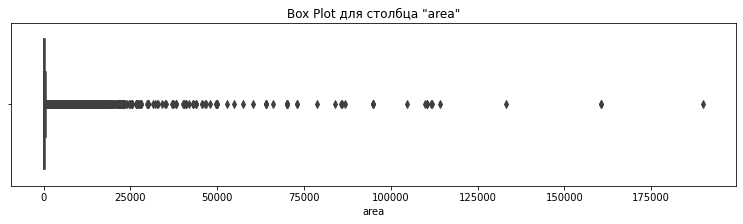

In [309]:
plt.figure(figsize=(13, 3))
sns.boxplot(x=df_cleaned['area'])
plt.title('Box Plot для столбца "area"')
plt.show()

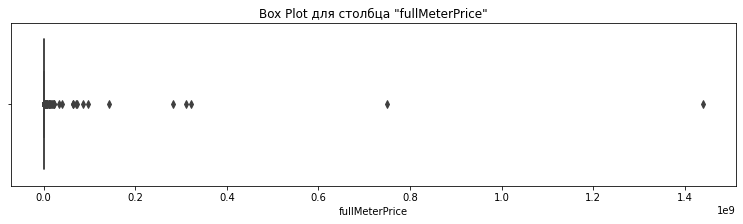

In [310]:
# Box plot для 'fullMeterPrice'
plt.figure(figsize=(13, 3))
sns.boxplot(x=df_cleaned['fullMeterPrice'])
plt.title('Box Plot для столбца "fullMeterPrice"')
plt.show()

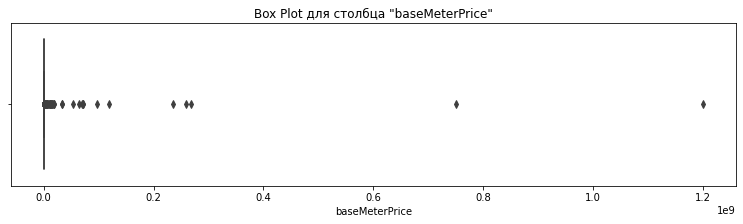

In [311]:
# Box plot для 'baseMeterPrice'
plt.figure(figsize=(13, 3))
sns.boxplot(x=df_cleaned['baseMeterPrice'])
plt.title('Box Plot для столбца "baseMeterPrice"')
plt.show()

In [312]:
print('Объекты класса A+ со ставкой больше 35000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'A+') & (df_cleaned['baseMeterPrice'] > 35000)])
print('Объекты класса A со ставкой меньше 20000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'A') & (df_cleaned['baseMeterPrice'] < 20000)])
print('Объекты класса B+ со ставкой меньше 13000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'B+') & (df_cleaned['baseMeterPrice'] < 13000)])
print('Объекты класса B со ставкой меньше 10000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'B') & (df_cleaned['baseMeterPrice'] < 10000)])
print('Объекты класса C+ со ставкой меньше 7000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'C+') & (df_cleaned['baseMeterPrice'] < 7000)])
print('Объекты класса C со ставкой меньше 5000')
display(df_cleaned[(df_cleaned['market'] == 'offices') & (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'C') & (df_cleaned['baseMeterPrice'] < 5000)])

Объекты класса A+ со ставкой больше 35000


id  status operation   market class_letter     area  \
3116  ro64745  active      rent  offices           A+  10000.0   
3122  ro56184  active      rent  offices           A+   1000.0   
3125  ro56187  active      rent  offices           A+   7000.0   
3126  ro80290  active      rent  offices           A+  32757.0   
3128  ro56185  active      rent  offices           A+   2000.0   
3129  ro56186  active      rent  offices           A+   5000.0   

      fullMeterPrice  fullAreaPrice  realtyid realty_prefix realty_name  tax  \
3116         55000.0     45833328.0      3920  Бизнес-центр       AFI2B  nds   
3122         55000.0      4583333.0      3920  Бизнес-центр       AFI2B  nds   
3125         55000.0     32083330.0      3920  Бизнес-центр       AFI2B  nds   
3126         55000.0    150136244.0      3920  Бизнес-центр       AFI2B  nds   
3128         55000.0      9166666.0      3920  Бизнес-центр       AFI2B  nds   
3129         55000.0     22916664.0      3920  Бизнес-центр       AFI2B  nds   

      baseMeterPrice  
3116         45833.0  
3122         45833.0  
3125         45833.0  
3126         45833.0  
3128         45833.0  
3129         45833.0

Объекты класса A со ставкой меньше 20000


id status operation   market class_letter   area  fullMeterPrice  \
164    ro82889    off      rent  offices            A   50.0         12000.0   
967    ro39884    off      rent  offices            A  105.0         20400.0   
968    ro65933    off      rent  offices            A   80.0         20400.0   
1004   ro34797    off      rent  offices            A  105.0         20400.0   
2666   ro38743    off      rent  offices            A  100.0         18800.0   
...        ...    ...       ...      ...          ...    ...             ...   
86236  ro65582    off      rent  offices            A   45.0         20400.0   
86241  ro23035    off      rent  offices            A   95.0         20400.0   
86251  ro58767    off      rent  offices            A  451.0         20400.0   
86255  ro36057    off      rent  offices            A  105.0         20400.0   
86258  ro35060    off      rent  offices            A  230.0         20400.0   

       fullAreaPrice  realtyid  realty_prefix              realty_name  tax  \
164          50000.0      5291   Бизнес-центр  1-й Земельный пер., 7/2  usn   
967         239846.0      3273   Бизнес-центр       2-й Обыденский, 11  usn   
968         239846.0      3273   Бизнес-центр       2-й Обыденский, 11  nds   
1004        239846.0      3051   Бизнес-центр        2-я Брестская, 30  nds   
2666        156823.0       889  Деловой центр                Aero City  nds   
...              ...       ...            ...                      ...  ...   
86236       239846.0       265   Бизнес-центр             Японский дом  nds   
86241       239846.0       265   Бизнес-центр             Японский дом  nds   
86251       239846.0       265   Бизнес-центр             Японский дом  nds   
86255       239846.0       265   Бизнес-центр             Японский дом  nds   
86258       239846.0       265   Бизнес-центр             Японский дом  nds   

       baseMeterPrice  
164           12000.0  
967           18000.0  
968           18000.0  
1004          18000.0  
2666          15667.0  
...               ...  
86236         18000.0  
86241         18000.0  
86251         18000.0  
86255         18000.0  
86258         18000.0  

[3074 rows x 13 columns]

Объекты класса B+ со ставкой меньше 13000


id status operation   market class_letter   area  fullMeterPrice  \
148    ro61906    off      rent  offices           B+  450.0         15500.0   
281    ro80299    off      rent  offices           B+   35.0         13714.0   
379    ro85931    off      rent  offices           B+   50.0         12000.0   
1297   ro40569    off      rent  offices           B+   40.0         12000.0   
1309    ro4379    off      rent  offices           B+   47.0         10000.0   
...        ...    ...       ...      ...          ...    ...             ...   
85999  ro80087    off      rent  offices           B+   34.0          5041.0   
86197  ro27337    off      rent  offices           B+  105.0         15000.0   
86298   ro9509    off      rent  offices           B+  120.0         14000.0   
86308  ro12205    off      rent  offices           B+  200.0         15000.0   
86316  ro14537    off      rent  offices           B+  391.0         14000.0   

       fullAreaPrice  realtyid realty_prefix               realty_name  tax  \
148         581250.0      3668  Бизнес центр            1905 года, 7с1  nds   
281          40000.0      3805  Бизнес-центр  1-й Тружеников пер, 12с2  nds   
379          50000.0      5303  Бизнес-центр         1-я Брестская, 22  nds   
1297         40500.0      1054  Бизнес-центр                        3D  nds   
1309         39167.0      1054  Бизнес-центр                        3D  nds   
...              ...       ...           ...                       ...  ...   
85999        71200.0      1854  Бизнес-центр      Яковоапостольский, 7  nds   
86197       239846.0      2632  Бизнес-центр           Ямское поле, 32  nds   
86298       140000.0      2578  Бизнес-центр                Яуза Тауэр  nds   
86308       250000.0      2578  Бизнес-центр                Яуза Тауэр  nds   
86316       456167.0      2578  Бизнес-центр                Яуза Тауэр  nds   

       baseMeterPrice  
148           12917.0  
281           11429.0  
379           10000.0  
1297          10000.0  
1309           8333.0  
...               ...  
85999          4201.0  
86197         12500.0  
86298         11667.0  
86308         12500.0  
86316         11667.0  

[4540 rows x 13 columns]

Объекты класса B со ставкой меньше 10000


id  status operation   market class_letter   area  fullMeterPrice  \
154    ro66931  active      rent  offices            B  831.0         10545.0   
630    ro45502     off      rent  offices            B   11.0          5450.0   
698    ro83864  active      rent  offices            B   26.0          6977.0   
710    ro64238     off      rent  offices            B  160.0          9363.0   
759    ro64235     off      rent  offices            B   18.0         11933.0   
...        ...     ...       ...      ...          ...    ...             ...   
85904  ro72479     off      rent  offices            B   19.0          9600.0   
86291  ro62632  active      rent  offices            B   85.0          8000.0   
86292  ro84472  active      rent  offices            B  111.0         11000.0   
86294  ro82248     off      rent  offices            B    1.0             1.0   
86335  ro82936     off      rent  offices            B    1.0             1.0   

       fullAreaPrice  realtyid            realty_prefix           realty_name  \
154         730000.0      3817             Бизнес-центр  1-й Автозаводский, 4   
630           5545.0       623             Бизнес-центр    1-я Энтузиастов, 6   
698          15000.0      4226           Нежилое здание     2-й Иртышский, 4Б   
710         124996.0      4226           Нежилое здание     2-й Иртышский, 4Б   
759          17999.0      4226           Нежилое здание     2-й Иртышский, 4Б   
...              ...       ...                      ...                   ...   
85904        14880.0      4327    Торгово-офисный центр                Юность   
86291        63467.0      4185  Административное здание          Ясеневая, 26   
86292       113960.0      4185  Административное здание          Ясеневая, 26   
86294       239846.0      5267  Административное здание       Ясный пр., 19с2   
86335       239846.0      5344             Бизнес-центр            Яузская, 5   

       tax  baseMeterPrice  
154    nds          8788.0  
630    nds          4542.0  
698    nds          5814.0  
710    nds          7802.0  
759    nds          9944.0  
...    ...             ...  
85904  usn          9600.0  
86291  nds          6667.0  
86292  nds          9167.0  
86294  nds             1.0  
86335  nds             1.0  

[3458 rows x 13 columns]

Объекты класса C+ со ставкой меньше 7000


id  status operation   market class_letter   area  fullMeterPrice  \
48072  ro78706     off      rent  offices           C+    1.0             1.0   
48270  ro85212  active      rent  offices           C+   69.0          7975.0   
48271  ro85213  active      rent  offices           C+  182.0          7200.0   
76759  ro24315  active      rent  offices           C+   55.0          1200.0   
79700  ro76775     off      rent  offices           C+    1.0             1.0   

       fullAreaPrice  realtyid            realty_prefix  \
48072       239846.0      5088  Административное здание   
48270        46002.0      5433    Офисно-торговый центр   
48271       109440.0      5433    Офисно-торговый центр   
76759         6050.0      3204            бизнес-центр2   
79700       239846.0      4997              Бизнес-парк   

                  realty_name  tax  baseMeterPrice  
48072   Милютинский пер., 9с1  nds             1.0  
48270              Мирус Авто  nds          6646.0  
48271              Мирус Авто  nds          6000.0  
76759  Тестовый и Красивый222  nds          1000.0  
79700   Фактория (строение 5)  nds             1.0

Объекты класса C со ставкой меньше 5000


id status operation   market class_letter    area  fullMeterPrice  \
617    ro55211    off      rent  offices            C   112.0          3700.0   
1739   ro17201    off      rent  offices            C    35.0          5299.0   
1759   ro10034    off      rent  offices            C   214.0          5520.0   
1774    ro2060    off      rent  offices            C    35.0          5402.0   
1902   ro22234    off      rent  offices            C  1000.0          1800.0   
...        ...    ...       ...      ...          ...     ...             ...   
85586   ro7030    off      rent  offices            C    44.0          4800.0   
85587   ro7025    off      rent  offices            C   250.0          5400.0   
85600  ro18629    off      rent  offices            C   500.0          3600.0   
85610  ro14538    off      rent  offices            C  1080.0          3222.0   
85940  ro81806    off      rent  offices            C     1.0             1.0   

       fullAreaPrice  realtyid                       realty_prefix  \
617          34533.0       816                  Складской комплекс   
1739         15500.0      2447                        Бизнес-центр   
1759         98400.0      2447                        Бизнес-центр   
1774         15800.0      2447                        Бизнес-центр   
1902        150000.0      2447                        Бизнес-центр   
...              ...       ...                                 ...   
85586        17600.0      2140  Производственно-складской комплекс   
85587       112500.0      2140  Производственно-складской комплекс   
85600       150000.0      1685             Административное здание   
85610       290001.0      1685             Административное здание   
85940       239846.0      5220             Административное здание   

              realty_name  tax  baseMeterPrice  
617    1-я Фрезерная, 2/1  nds          3083.0  
1739   4-й Лихачевский, 4  nds          4416.0  
1759   4-й Лихачевский, 4  nds          4600.0  
1774   4-й Лихачевский, 4  nds          4501.0  
1902   4-й Лихачевский, 4  nds          1500.0  
...                   ...  ...             ...  
85586                  Юг  nds          4000.0  
85587                  Юг  nds          4500.0  
85600    Южнопортовая, 21  nds          3000.0  
85610    Южнопортовая, 21  nds          2685.0  
85940      Яблочкова, 19А  nds             1.0  

[212 rows x 13 columns]

<img src="https://github.com/SegaGLm/random_projects/PVT_realty_estate_data_analysis/data/Comparison of rental rates/Screenshot_15.png?raw=true">
<img src="https://github.com/SegaGLm/random_projects/PVT_realty_estate_data_analysis/data/Comparison of rental rates/Screenshot_16.png?raw=true">
<img src="https://github.com/SegaGLm/random_projects/PVT_realty_estate_data_analysis/data/Comparison of rental rates/Screenshot_17.png?raw=true">


In [313]:
# Удаление объектов класса A
df_cleaned_3 = df_cleaned.drop(df_cleaned[(df_cleaned['market'] == 'offices') & \
    (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'A') & \
        (df_cleaned['baseMeterPrice'] < 20000)].index)

# Удаление объектов класса B+
df_cleaned_3 = df_cleaned_3.drop(df_cleaned[(df_cleaned['market'] == 'offices') & \
    (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'B+') & \
        (df_cleaned['baseMeterPrice'] < 13000)].index)

# Удаление объектов класса B
df_cleaned_3 = df_cleaned_3.drop(df_cleaned[(df_cleaned['market'] == 'offices') & \
    (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'B') & \
        (df_cleaned['baseMeterPrice'] < 10000)].index)

# Удаление объектов класса C+
df_cleaned_3 = df_cleaned_3.drop(df_cleaned[(df_cleaned['market'] == 'offices') & \
    (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'C+') & \
        (df_cleaned['baseMeterPrice'] < 7000)].index)

# Удаление объектов класса C
df_cleaned_3 = df_cleaned_3.drop(df_cleaned[(df_cleaned['market'] == 'offices') & \
    (df_cleaned['operation'] == 'rent') & (df_cleaned['class_letter'] == 'C') & \
        (df_cleaned['baseMeterPrice'] < 5000)].index)

print('Объекты класса A+')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'A+') & \
        (df_cleaned_3['baseMeterPrice'] > 35000)])
print('Объекты класса A')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'A') & \
        (df_cleaned_3['baseMeterPrice'] > 20000)])
print('Объекты класса B+')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'B+') & \
        (df_cleaned_3['baseMeterPrice'] > 13000)])
print('Объекты класса B')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'B') & \
        (df_cleaned_3['baseMeterPrice'] > 10000)])
print('Объекты класса C+')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'C+') & \
        (df_cleaned_3['baseMeterPrice'] > 7000)])
print('Объекты класса C')
display(df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent') & \
    (df_cleaned_3['class_letter'] == 'C') & \
        (df_cleaned_3['baseMeterPrice'] > 5000)])


Объекты класса A+


id  status operation   market class_letter     area  \
3116  ro64745  active      rent  offices           A+  10000.0   
3122  ro56184  active      rent  offices           A+   1000.0   
3125  ro56187  active      rent  offices           A+   7000.0   
3126  ro80290  active      rent  offices           A+  32757.0   
3128  ro56185  active      rent  offices           A+   2000.0   
3129  ro56186  active      rent  offices           A+   5000.0   

      fullMeterPrice  fullAreaPrice  realtyid realty_prefix realty_name  tax  \
3116         55000.0     45833328.0      3920  Бизнес-центр       AFI2B  nds   
3122         55000.0      4583333.0      3920  Бизнес-центр       AFI2B  nds   
3125         55000.0     32083330.0      3920  Бизнес-центр       AFI2B  nds   
3126         55000.0    150136244.0      3920  Бизнес-центр       AFI2B  nds   
3128         55000.0      9166666.0      3920  Бизнес-центр       AFI2B  nds   
3129         55000.0     22916664.0      3920  Бизнес-центр       AFI2B  nds   

      baseMeterPrice  
3116         45833.0  
3122         45833.0  
3125         45833.0  
3126         45833.0  
3128         45833.0  
3129         45833.0

Объекты класса A


id status operation   market class_letter   area  fullMeterPrice  \
169    ro29695    off      rent  offices            A  153.0         30000.0   
173    ro29696    off      rent  offices            A  166.0         30000.0   
175    ro29694    off      rent  offices            A  153.0         30000.0   
177    ro29692    off      rent  offices            A  149.0         30000.0   
180    ro29693    off      rent  offices            A  152.0         30000.0   
...        ...    ...       ...      ...          ...    ...             ...   
86253   ro7888    off      rent  offices            A  341.0         29500.0   
86256  ro22817    off      rent  offices            A  715.0         26550.0   
86257  ro19969    off      rent  offices            A  203.0         26550.0   
86259  ro56906    off      rent  offices            A   83.0         30000.0   
86260    ro246    off      rent  offices            A   70.0         30000.0   

       fullAreaPrice  realtyid            realty_prefix          realty_name  \
169         383250.0      3201  Административное здание  1-й Колобовский, 17   
173         415000.0      3201  Административное здание  1-й Колобовский, 17   
175         382500.0      3201  Административное здание  1-й Колобовский, 17   
177         373500.0      3201  Административное здание  1-й Колобовский, 17   
180         379750.0      3201  Административное здание  1-й Колобовский, 17   
...              ...       ...                      ...                  ...   
86253       837579.0       265             Бизнес-центр         Японский дом   
86256      1581937.0       265             Бизнес-центр         Японский дом   
86257       449027.0       265             Бизнес-центр         Японский дом   
86259       206675.0       265             Бизнес-центр         Японский дом   
86260       175000.0       265             Бизнес-центр         Японский дом   

       tax  baseMeterPrice  
169    usn         30000.0  
173    usn         30000.0  
175    usn         30000.0  
177    usn         30000.0  
180    usn         30000.0  
...    ...             ...  
86253  nds         24583.0  
86256  nds         22125.0  
86257  nds         22125.0  
86259  nds         25000.0  
86260  nds         25000.0  

[9472 rows x 13 columns]

Объекты класса B+


id status operation   market class_letter   area  fullMeterPrice  \
7      ro82156    off      rent  offices           B+   46.0         38000.0   
149    ro54446    off      rent  offices           B+  510.0         15500.0   
150    ro48580    off      rent  offices           B+  548.0         20520.0   
163    ro71851    off      rent  offices           B+  111.0         28500.0   
239    ro69416    off      rent  offices           B+  164.0         33007.0   
...        ...    ...       ...      ...          ...    ...             ...   
86326  ro18365    off      rent  offices           B+  303.0         16000.0   
86327   ro8654    off      rent  offices           B+  170.0         19000.0   
86329  ro18364    off      rent  offices           B+   60.0         16000.0   
86333  ro42867    off      rent  offices           B+  145.0         19000.0   
86334  ro41040    off      rent  offices           B+   38.0         17500.0   

       fullAreaPrice  realtyid realty_prefix                   realty_name  \
7           147187.0      4614           ОСЗ  12-й проезд Марьиной Рощи, 8   
149         658750.0      3668  Бизнес центр                1905 года, 7с1   
150         937080.0      3668  Бизнес центр                1905 года, 7с1   
163         263625.0        42       Особняк            1-й Вышеславцев, 6   
239         450000.0      3805  Бизнес-центр      1-й Тружеников пер, 12с2   
...              ...       ...           ...                           ...   
86326       404000.0      2578  Бизнес-центр                    Яуза Тауэр   
86327       269167.0      2578  Бизнес-центр                    Яуза Тауэр   
86329        80000.0      2578  Бизнес-центр                    Яуза Тауэр   
86333       229583.0      2578  Бизнес-центр                    Яуза Тауэр   
86334        55417.0      2578  Бизнес-центр                    Яуза Тауэр   

       tax  baseMeterPrice  
7      nds         31667.0  
149    usn         15500.0  
150    nds         17100.0  
163    nds         23750.0  
239    nds         27506.0  
...    ...             ...  
86326  nds         13333.0  
86327  usn         19000.0  
86329  usn         16000.0  
86333  usn         19000.0  
86334  usn         17500.0  

[15713 rows x 13 columns]

Объекты класса B


id  status operation   market class_letter    area  \
23     ro71606     off      rent  offices            B    32.0   
25     ro64947     off      rent  offices            B    32.0   
26     ro23885     off      rent  offices            B    12.0   
29     ro77062     off      rent  offices            B    30.0   
30     ro14106     off      rent  offices            B    20.0   
...        ...     ...       ...      ...          ...     ...   
86338  ro15834     off      rent  offices            B  1000.0   
86339  ro84092  active      rent  offices            B   133.0   
86340  ro81684     off      rent  offices            B   155.0   
86341  ro84093     off      rent  offices            B    50.0   
86343  ro81683     off      rent  offices            B   150.0   

       fullMeterPrice  fullAreaPrice  realtyid            realty_prefix  \
23            12000.0        32000.0       628                   Здание   
25            12000.0        32000.0       628                   Здание   
26            12000.0        12400.0       628                   Здание   
29            12000.0        30000.0       628                   Здание   
30            12000.0        20000.0       628                   Здание   
...               ...            ...       ...                      ...   
86338         21600.0      1800000.0      2880                  Особняк   
86339         24700.0       273758.0      5204  Административное здание   
86340         24700.0       318218.0      5204  Административное здание   
86341         24700.0       102917.0      5204  Административное здание   
86343         24700.0       308750.0      5204  Административное здание   

              realty_name  tax  baseMeterPrice  
23          16-я Парковая  usn         12000.0  
25          16-я Парковая  usn         12000.0  
26          16-я Парковая  usn         12000.0  
29          16-я Парковая  usn         12000.0  
30          16-я Парковая  usn         12000.0  
...                   ...  ...             ...  
86338          Яузская, 6  nds         18000.0  
86339  Яузский б-р., 13с3  usn         24700.0  
86340  Яузский б-р., 13с3  usn         24700.0  
86341  Яузский б-р., 13с3  usn         24700.0  
86343  Яузский б-р., 13с3  usn         24700.0  

[19525 rows x 13 columns]

Объекты класса C+


id  status operation   market class_letter   area  fullMeterPrice  \
18108  ro82208     off      rent  offices           C+    1.0         20400.0   
25353  ro84185     off      rent  offices           C+   50.0         12000.0   
36444  ro81958  active      rent  offices           C+  106.0         13811.0   
48269  ro85211  active      rent  offices           C+   42.0          9636.0   
65561  ro82247     off      rent  offices           C+    1.0         20400.0   
76760  ro68479     off      rent  offices           C+    5.0         20400.0   
76761  ro65806     off      rent  offices           C+   70.0         12000.0   
76762  ro61303     off      rent  offices           C+  564.0         12000.0   
76763  ro24314     off      rent  offices           C+  234.0         24000.0   
85132  ro35628  active      rent  offices           C+   40.0         23000.0   
85133  ro65802  active      rent  offices           C+   15.0         23000.0   
85134  ro65803     off      rent  offices           C+   12.0         20000.0   
85135  ro68343     off      rent  offices           C+   50.0         19200.0   
85136  ro41699     off      rent  offices           C+  143.0         27712.0   
85137  ro71651     off      rent  offices           C+   60.0         17000.0   
85139  ro43678     off      rent  offices           C+   15.0         12000.0   

       fullAreaPrice  realtyid            realty_prefix  \
18108       239846.0      5258  Административное здание   
25353        50000.0      5290             Бизнес-центр   
36444       122000.0      5048  Административное здание   
48269        33999.0      5433    Офисно-торговый центр   
65561       239846.0      5266  Административное здание   
76760         9350.0      3204            бизнес-центр2   
76761        70000.0      3204            бизнес-центр2   
76762       564000.0      3204            бизнес-центр2   
76763       514800.0      3204            бизнес-центр2   
85132        76667.0       369             Бизнес-центр   
85133        28750.0       369             Бизнес-центр   
85134        20000.0       369             Бизнес-центр   
85135        80000.0       369             Бизнес-центр   
85136       330004.0       369             Бизнес-центр   
85137        85000.0       369             Бизнес-центр   
85139        15000.0       369             Бизнес-центр   

                  realty_name  tax  baseMeterPrice  
18108              Акулово, 8  usn         18000.0  
25353      Бумажный пр., 14с1  nds         10000.0  
36444       Зеленоград, к322А  nds         11509.0  
48269              Мирус Авто  nds          8030.0  
65561        Родниковая, 7с35  usn         18000.0  
76760  Тестовый и Красивый222  nds         17000.0  
76761  Тестовый и Красивый222  nds         10000.0  
76762  Тестовый и Красивый222  nds         10000.0  
76763  Тестовый и Красивый222  nds         20000.0  
85132                Электрон  nds         19167.0  
85133                Электрон  nds         19167.0  
85134                Электрон  nds         16667.0  
85135                Электрон  nds         16000.0  
85136                Электрон  usn         27712.0  
85137                Электрон  nds         14167.0  
85139                Электрон  usn         12000.0

Объекты класса C


id status operation   market class_letter   area  fullMeterPrice  \
5      ro84445    off      rent  offices            C   50.0         20400.0   
6      ro26278    off      rent  offices            C  105.0         20400.0   
9      ro80143    off      rent  offices            C   21.0         13200.0   
10     ro80144    off      rent  offices            C   24.0         13200.0   
12     ro74406    off      rent  offices            C   34.0         12000.0   
...        ...    ...       ...      ...          ...    ...             ...   
86279  ro26069    off      rent  offices            C  105.0         14000.0   
86280  ro18768    off      rent  offices            C   69.0         20400.0   
86281  ro18771    off      rent  offices            C   94.0         20400.0   
86283   ro6224    off      rent  offices            C  162.0         13000.0   
86284  ro18773    off      rent  offices            C   95.0         20400.0   

       fullAreaPrice  realtyid            realty_prefix  \
5           239846.0      5264  Административное здание   
6           239846.0       559  Административное здание   
9            23100.0      4812             Бизнес-центр   
10           26400.0      4812             Бизнес-центр   
12           34000.0      4812             Бизнес-центр   
...              ...       ...                      ...   
86279       239846.0       139                Помещение   
86280       239846.0       139                Помещение   
86281       239846.0       139                Помещение   
86283       176042.0       139                Помещение   
86284       239846.0       139                Помещение   

                        realty_name  tax  baseMeterPrice  
5               2005-05-09 00:00:00  usn         18000.0  
6      11-я улица Текстильщиков, 11  usn         18000.0  
9                 15-я Парковая, 10  usn         13200.0  
10                15-я Парковая, 10  usn         13200.0  
12                15-я Парковая, 10  usn         12000.0  
...                             ...  ...             ...  
86279                   Ярославский  usn         14000.0  
86280                   Ярославский  usn         18000.0  
86281                   Ярославский  usn         18000.0  
86283                   Ярославский  usn         13000.0  
86284                   Ярославский  usn         18000.0  

[4945 rows x 13 columns]

In [314]:
# Итоговая таблица с расчетом средних и медианных ставок аренды офисов

result_df = df_cleaned_3[(df_cleaned_3['market'] == 'offices') & (df_cleaned_3['operation'] == 'rent')].\
    groupby(['operation', 'market', 'class_letter']).agg({                                                                     
    'baseMeterPrice': ['max', 'min', 'mean', 'median']
})
    
result_df = result_df.round(-3)

result_df

baseMeterPrice                           
                                          max      min     mean   median
operation market  class_letter                                          
rent      offices A               119500000.0  20000.0  67000.0  34000.0
                  A+                  46000.0  46000.0  46000.0  46000.0
                  B                 1575000.0  10000.0  19000.0  15000.0
                  B+               18288000.0  13000.0  27000.0  19000.0
                  C                  750000.0   5000.0  14000.0  11000.0
                  C+                  28000.0   8000.0  15000.0  16000.0

**Заключение**

В датасете были обнаружены пропущенные данные, а также выбросы. После предварительной обработки данных, стало возможно расчитать средние и медианные значения ставки аренды офисов. Были выборочно проверены ставки аренды указанные в датасете, со ставками указанными на сайтах конкурентов. Значения примерно сходятся.
Для указания цены в текстах объявлений рекламных кампаний Яндек Директ, можно использовать средние значения из сформированной таблицы.